In [1]:
import osmnx as ox
import networkx as nx
from network import get_road_net, multistar_downhill_descent

In [2]:
# place_name = "Uniontown, Alabama, USA"
# get_road_net(place_name)

In [3]:
G = ox.load_graphml("road_net_2.graphml")

In [4]:
treatment_nodes = multistar_downhill_descent(G, 20)

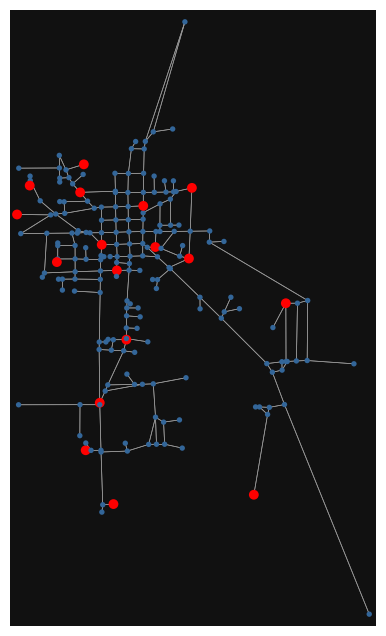

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [7]:
node_colors = ['r' if node in treatment_nodes else '#336699' for node in G.nodes()]
node_sizes = [50 if node in treatment_nodes else 15 for node in G.nodes()]

ox.plot_graph(G, node_color=node_colors, node_size=node_sizes, edge_color='#999999', edge_linewidth=0.5)

In [8]:
source_nodes = []
for node in G.nodes:
    if node not in treatment_nodes:
        source_nodes.append(node)

17